# Water Quality Prediction by using Machine Learning

# Package Importing

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
import warnings
warnings.filterwarnings('ignore')

# Dataset Reading

In [34]:
Input_Data = pd.read_csv("data.csv")
Input_Data

,PH,Turbidity,temperature,Potability
0,3.716080,2.963135,4.3,0
1,8.099124,4.500656,5.9,0
2,8.316766,3.055934,4.3,0
3,9.092223,4.628771,7.5,0
4,5.584087,4.075075,4.5,0
5,10.223862,2.559708,3.9,0
6,8.635849,2.672989,5.4,0
7,11.180284,4.401425,4.3,0
8,7.360640,3.595017,5.9,0
9,7.974522,4.370562,4.3,0


# Datasets Pre-Processing

In [35]:
Input_Data.head()

,PH,Turbidity,temperature,Potability
0,3.716080,2.963135,4.3,0
1,8.099124,4.500656,5.9,0
2,8.316766,3.055934,4.3,0
3,9.092223,4.628771,7.5,0
4,5.584087,4.075075,4.5,0


In [36]:
Input_Data.tail()

,PH,Turbidity,temperature,Potability
44,4.999414,4.542801,3.6,1
45,8.692092,4.137739,7.3,1
46,8.085760,3.195710,4.2,1
47,6.203978,3.999775,3.7,1
48,5.058109,4.405586,5.4,1


In [37]:
Input_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PH           49 non-null     float64
 1   Turbidity    49 non-null     float64
 2   temperature  49 non-null     float64
 3   Potability   49 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 1.7 KB


In [38]:
Input_Data.describe()

,PH,Turbidity,temperature,Potability
count,49.000000,49.000000,49.000000,49.000000
mean,7.359480,4.044541,5.004082,0.510204
std,1.987684,0.834371,1.222695,0.505076
min,3.445062,2.436086,3.600000,0.000000
25%,5.702926,3.464353,4.100000,0.000000
50%,7.371050,4.137739,4.500000,1.000000
75%,8.757257,4.528523,5.700000,1.000000
max,11.180284,6.038185,7.500000,1.000000


In [39]:
Input_Data.value_counts('Potability')

Potability
1    25
0    24
dtype: int64

In [40]:
Input_Data.isna().sum()

PH             0
Turbidity      0
temperature    0
Potability     0
dtype: int64

# Data Visualiation : Explorartory Data Analysis

<AxesSubplot: >

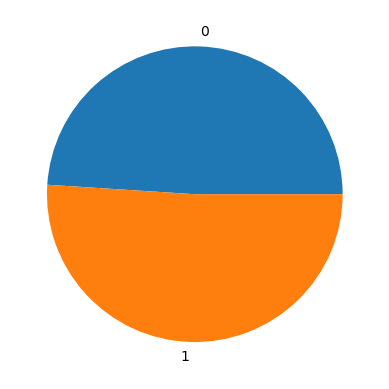

In [41]:
Input_Data.groupby('Potability').size().plot(kind='pie')

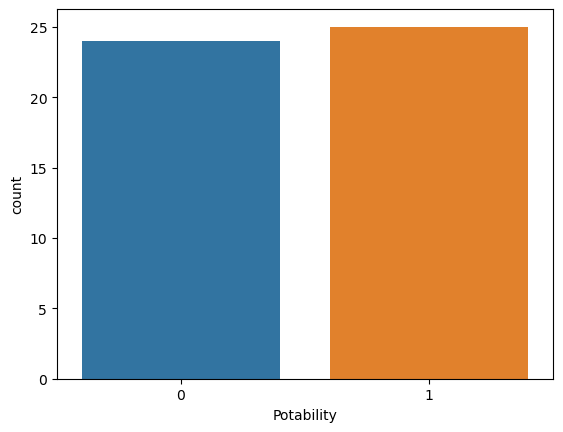

In [42]:
# count plot on single categorical variable
sns.countplot(x ='Potability', data = Input_Data)
 
# Show the plot
plt.show()

<AxesSubplot: xlabel='PH'>

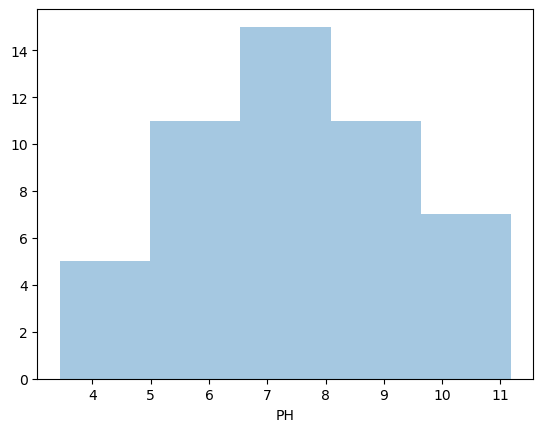

In [43]:
sns.distplot(a=Input_Data['PH'], kde=False)

In [44]:
sns.distplot(a=Input_Data['Turbidity'], kde=False)

In [ ]:
sns.distplot(a=Input_Data['temperature'], kde=False)


In [ ]:
sns.kdeplot(data=Input_Data['PH'], shade=True)

In [ ]:
sns.kdeplot(data=Input_Data['Turbidity'], shade=True)

In [ ]:
sns.kdeplot(data=Input_Data['temperature'], shade=True)

In [ ]:
import seaborn as sns
corr = Input_Data.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot = True)

In [ ]:
# !pip install pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(Input_Data, title="Report for our Project", explorative=True)
profile.to_notebook_iframe()

# Model Implementation : Machine Learning Model

In [ ]:
Input = Input_Data.drop('Potability',axis =1)
Input

In [ ]:
Output = Input_Data['Potability']
Output

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size = 0.2, random_state=0)

# Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
classifier_RF = RandomForestClassifier()
classifier_RF = classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)
Accuracy_RF = accuracy_score(y_test,y_pred_RF)
print("Model Accuracy of Random Forest Algorithm:",Accuracy_RF)

# Confusion Matrix for Random Forest Algorithm

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred_RF)
print("Confusion Matrix:")
print(result)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(result,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Classification Report for  Random Forest Algorithm

In [ ]:
result1 = classification_report(y_test, y_pred_RF)
print("Classification Report:",)
print (result1)

# Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,y_train)
predict_NB = NB.predict(X_test)
Acuracy_NB = NB.score(X_test,predict_NB)
print("Model Accuracy of Naive Bayes Algorithm:",Acuracy_NB)

# Confusion Matrix for Naive Bayes Algorithm

In [ ]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm_NB = confusion_matrix(y_test, predict_NB)  
print("Confusion Matrix:")
print(cm_NB)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_NB,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Classification Report for Naive Bayes Algorithm

In [ ]:
cm_NB = classification_report(y_test, predict_NB)
print("Classification Report:",)
print (cm_NB)

# Comparison of all the Algorithm

In [ ]:
model_accuracy_knn_lr = pd.Series(data=[Accuracy_RF,Acuracy_NB], 
                index=['Random Forest','Naive Bayes'])
fig= plt.figure(figsize=(5,5))
model_accuracy_knn_lr.sort_values().plot.barh()
plt.title('Model Accracy of all the Algorithm')